**Machine Learning Assignment 1 - Group B**

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd

df1=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/opel_corsa_01.csv', sep=";")
df2=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/opel_corsa_02.csv', sep=";")
#df3=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/peugeot_207_01.csv', sep=";")
#df4=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/peugeot_207_02.csv', sep=";")

#allframes = [df1,df2,df3,df4]
allframes = [df1, df2]

feature_names = list(df1.head(0))
feature_names.pop(0)

print(feature_names)


['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage', 'roadSurface', 'traffic', 'drivingStyle']


In [59]:
df = pd.concat(allframes)
#print out first 5 rows of data set
df.head()

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [60]:
df.drop(['Unnamed: 0', 'traffic'], axis=1, inplace=True)
df.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,SmoothCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,SmoothCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,SmoothCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,SmoothCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,SmoothCondition,EvenPaceStyle


In [61]:
df.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
count,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000
mean,-0.478689,39.021730,39.185487,194.612717,-0.022943,0.680345,29.436817,76.253369,119.002875,1601.092902,17.185517,16.957862,1.528442,16.164601
std,2.036172,34.845227,31.849461,192.573430,2.332198,2.069489,21.412885,9.869676,25.184805,561.948593,10.678724,4.196808,4.794766,5.073774
min,-9.200012,0.000000,0.000000,0.000000,-17.789218,-2.380000,0.000000,40.000000,98.000000,752.000000,4.010000,7.000000,-1.246000,7.271883
25%,-1.700012,9.513855,15.837660,49.953278,-0.900721,-0.301000,16.470589,77.000000,102.000000,1000.250000,8.180000,14.000000,-0.136700,12.028536
50%,-0.200012,30.849661,27.730916,128.287362,0.000000,0.133000,26.274509,80.000000,109.000000,1694.000000,15.480000,17.000000,0.125000,15.909114
75%,0.399963,58.096436,54.418498,274.462603,0.900721,0.734300,39.607845,82.000000,125.000000,2086.000000,22.677500,19.000000,0.386700,19.982862
max,10.700012,124.749725,121.330733,1051.789888,12.384899,8.477800,100.000000,89.000000,252.000000,3167.000000,73.250000,34.000000,17.944800,45.336861


In [62]:
df.describe(include=[np.object])

,roadSurface,drivingStyle
count,11130,11130
unique,2,2
top,SmoothCondition,EvenPaceStyle
freq,10685,9041


In [0]:
df['drivingStyle'] = df.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df['roadSurface']= df.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})

In [0]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for opel_corsa_01', fontsize=15)
    plt.show()

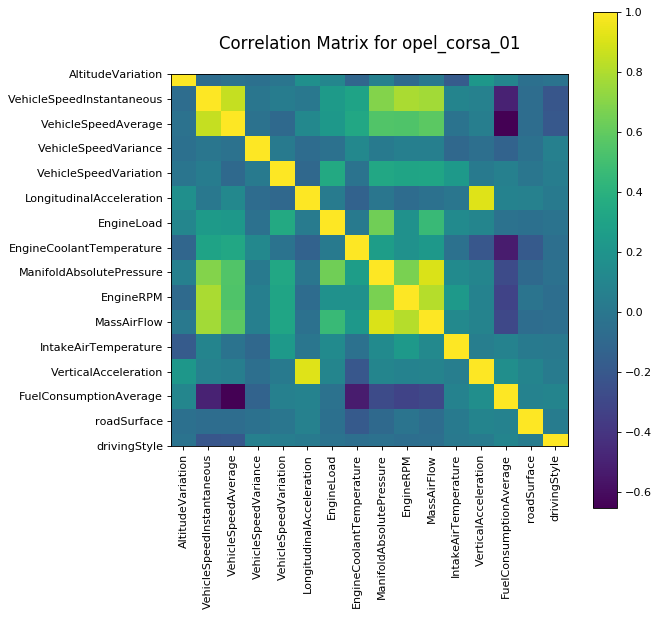

In [65]:
plotCorrelationMatrix(df, 8)

Before balancing data, see how classifiers perform:


In [66]:
list(df.columns)

['AltitudeVariation',
 'VehicleSpeedInstantaneous',
 'VehicleSpeedAverage',
 'VehicleSpeedVariance',
 'VehicleSpeedVariation',
 'LongitudinalAcceleration',
 'EngineLoad',
 'EngineCoolantTemperature',
 'ManifoldAbsolutePressure',
 'EngineRPM',
 'MassAirFlow',
 'IntakeAirTemperature',
 'VerticalAcceleration',
 'FuelConsumptionAverage',
 'roadSurface',
 'drivingStyle']

In [0]:
features = ['AltitudeVariation','VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']

In [68]:
X = df[features]
X.head()


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638


In [69]:
print(X.shape)

(11130, 14)


In [47]:

#feature_names.pop(16)
#feature_names.pop(15)
#feature_names.pop(14)
#print(feature_names)
#for i in feature_names:
#        df[i].fillna(df[i].mean(), inplace=True)

['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage']


In [49]:
#df.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle
count,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000,23775.000000
mean,-0.263008,38.644538,38.811064,171.920888,-0.020554,0.681683,36.762356,70.818721,115.195120,1486.820257,16.045632,23.483004,0.463398,15.171096,0.116046
std,2.091264,33.858027,31.149198,182.751192,2.475485,1.582911,26.637791,15.683371,20.453117,578.003748,9.691234,10.901340,3.462745,4.603290,0.320287
min,-24.600006,0.000000,0.000000,0.000000,-103.500000,-3.065000,0.000000,12.000000,88.000000,0.000000,0.880000,7.000000,-2.763100,7.271883,0.000000
25%,-1.399996,11.700000,15.991532,46.048954,-0.900001,-0.219000,18.823530,63.000000,102.000000,854.000000,6.970000,16.000000,-0.554000,11.673309,0.000000
50%,-0.099998,31.500000,29.314682,113.907731,0.000000,0.391000,31.372549,79.000000,107.000000,1485.500000,15.360000,19.000000,-0.078100,14.520984,0.000000
75%,0.700001,54.899998,50.148162,230.200656,0.900002,1.159700,58.431374,81.000000,120.000000,1955.250000,21.709999,31.000000,0.237250,18.283518,0.000000
max,11.400002,124.749725,121.330733,1418.370369,97.199997,8.477800,100.000000,89.000000,252.000000,3167.000000,73.250000,65.000000,17.944800,45.336861,1.000000


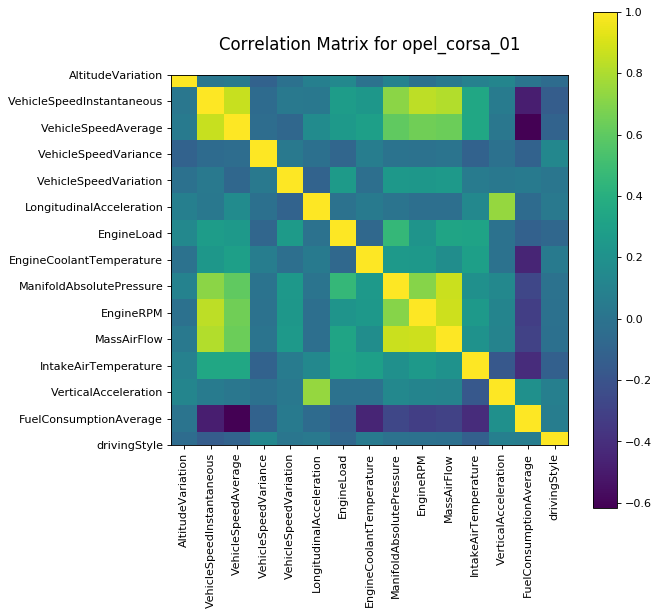

In [50]:
#plotCorrelationMatrix(df, 8)

In [70]:
y = df['drivingStyle']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: drivingStyle, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8347, 14)
(2783, 14)
(8347,)
(2783,)


In [72]:
aggressive_percent = y_test.mean()
even_percent = 1 - y_test.mean()
print(aggressive_percent)
print(even_percent)


0.1814588573481854
0.8185411426518145


=> Even if Even Driving Style is predicted always, the accuracy would be **81.8%**
=> We need to design a classifer that provides better accuracy than this!

In [73]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred = logreg.predict(X_test)
from sklearn import metrics
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.8192597915918074
Precision:  0.5138888888888888
Recall:  0.07326732673267326
F1 Score:  0.07326732673267326
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      2278
           1       0.51      0.07      0.13       505

    accuracy                           0.82      2783
   macro avg       0.67      0.53      0.51      2783
weighted avg       0.77      0.82      0.76      2783

Confusion Matrix: 
 [[2243   35]
 [ 468   37]]


In [75]:
logreg = LogisticRegression(solver='liblinear',class_weight='balanced')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = logreg.predict(X_test)

print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  0.6083363277039167
Precision:  0.28317272053372866
Recall:  0.7564356435643564
F1 Score:  0.7564356435643564
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.58      0.71      2278
           1       0.28      0.76      0.41       505

    accuracy                           0.61      2783
   macro avg       0.60      0.67      0.56      2783
weighted avg       0.80      0.61      0.65      2783

Confusion Matrix: 
 [[1311  967]
 [ 123  382]]


In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y2_pred = knn.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y2_pred))
print("Precision: ", metrics.precision_score(y_test, y2_pred))
print("Recall: ", metrics.recall_score(y_test, y2_pred))
print("F1 Score: ", metrics.recall_score(y_test, y2_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y2_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y2_pred))

Compare actual response with predicted (accuracy):  0.8196191160618038
Precision:  0.5043227665706052
Recall:  0.3465346534653465
F1 Score:  0.3465346534653465
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2278
           1       0.50      0.35      0.41       505

    accuracy                           0.82      2783
   macro avg       0.68      0.64      0.65      2783
weighted avg       0.80      0.82      0.81      2783

Confusion Matrix: 
 [[2106  172]
 [ 330  175]]


In [78]:
from sklearn import svm
modelsvm = svm.SVC(kernel ='linear')
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [79]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.8192597915918074
Precision:  0.5192307692307693
Recall:  0.053465346534653464
F1 Score:  0.053465346534653464
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      2278
           1       0.52      0.05      0.10       505

    accuracy                           0.82      2783
   macro avg       0.67      0.52      0.50      2783
weighted avg       0.77      0.82      0.75      2783

Confusion Matrix: 
 [[2253   25]
 [ 478   27]]


In [80]:
modelsvm = svm.SVC(kernel ='linear',class_weight='balanced')
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [81]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  0.5939633489040603
Precision:  0.2813156053184045
Recall:  0.7960396039603961
F1 Score:  0.7960396039603961
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.55      0.69      2278
           1       0.28      0.80      0.42       505

    accuracy                           0.59      2783
   macro avg       0.60      0.67      0.55      2783
weighted avg       0.81      0.59      0.64      2783

Confusion Matrix: 
 [[1251 1027]
 [ 103  402]]
